In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Wczytanie danych oraz zamiana przecinkow na kropki w kolumnie 'Ta4'
df = pd.read_csv('df_task_final.csv')
df['Ta4'] = df['Ta4'].str.replace(',','.')

In [41]:
# funkcja obliczaja srednia kraczaca dla wszystkich kolumn dla pierwszych 300 obserwacji
# przyjmuje 2 parametry 1 - ramka danych, 2 - parametr window typu int (szerokosc okna dla ktorego liczymy
# srednia kroczaca)

def df_to_moving_avarage(dataframe, window):
    df_cutted = dataframe[0:window]
    colnames = df_cutted.columns
    new_colnames = ['Timestamp']
    for colname in colnames:
        col_num = df_cutted[colname].to_numpy()
        try:
            col_num = col_num.astype(np.float)
            new_colnames.append(colname+'__'+str(window)+'__mean')
        except:
            pass
    new_df = pd.DataFrame(columns=new_colnames)
    for i in range(300):
        df_cutted = dataframe[i:window+i]
    
        avarage_list = [df_cutted['Timestamp'].iloc[-1]]
        for colname in colnames:
            col_num = df_cutted[colname].to_numpy()
            try:
                col_num = col_num.astype(np.float)
                avarage_list.append(np.mean(col_num))
            except:
                pass
        new_df.loc[len(new_df)] = avarage_list
    
    return new_df

In [42]:
new_df = df_to_moving_avarage(df, 20)

In [43]:
new_df.head()

,Timestamp,P1__20__mean,T1__20__mean,T2__20__mean,Ta1__20__mean,Ta3__20__mean,Ta4__20__mean,Ta5__20__mean,Ta6__20__mean,Ta7__20__mean,Ta8__20__mean,Ta_q__20__mean,power__20__mean
0,2004-02-10 00:19:00,-262.465391,608.949474,593.235658,186.540047,165.314170,191.088443,175.791580,195.231898,199.067122,199.996150,392.393162,-275.507592
1,2004-02-10 00:20:00,-262.419589,608.673154,592.969700,187.215634,166.745571,192.030254,176.653573,196.170460,200.019155,200.922434,392.348776,-275.504699
2,2004-02-10 00:21:00,-262.366959,608.409394,592.743306,187.940252,168.259520,193.003088,177.554675,197.158696,201.026326,201.924172,391.215893,-275.501026
3,2004-02-10 00:22:00,-262.307499,608.158351,592.556476,188.738833,169.978874,194.022050,178.519234,198.210612,202.087285,202.980374,389.866784,-275.497412
4,2004-02-10 00:23:00,-262.241116,607.919711,592.409053,189.599648,171.717993,195.089164,179.539890,199.316442,203.209051,204.086014,389.843403,-275.494187


In [44]:
power_df = df.iloc[:200, :]
power_df = power_df.iloc[: , 13:14].values

In [45]:
power_mean = new_df.iloc[:200, :]
power_mean = power_mean.iloc[: , 12:13].values

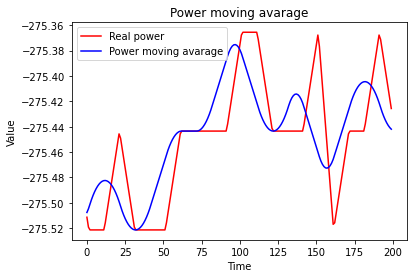

In [46]:
# WIZUALIZACJA WYNIKÓW NA PRZYKLADZIE ZMIENNEJ POWER
plt.plot(power_df, color = 'red', label = 'Real power')
plt.plot(power_mean, color = 'blue', label = 'Power moving avarage')
plt.title('Power moving avarage')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()